<a href="https://colab.research.google.com/github/wanana12/signate/blob/main/bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ライブラリの読み込み

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## データの読み込み

In [3]:
!ls /content/drive/MyDrive/bot

sample_submit.csv  test.tsv  train.tsv


In [4]:
train = pd.read_csv("/content/drive/MyDrive/bot/train.tsv", sep='\t')
test = pd.read_csv("/content/drive/MyDrive/bot/test.tsv", sep='\t')
sample_submit = pd.read_csv("/content/drive/MyDrive/bot/sample_submit.csv", header=None)

In [5]:
sample_submit.head()

,0,1
0,1,1
1,4,1
2,5,0
3,6,1
4,8,0


In [6]:
train.head()

,id,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
0,0,0,715,0,0,423,206,150,1,34,36981,0.684902,3958.863636,97.513514,1.473684,0.504505
1,2,0,2151,0,0,1457,1321,1704,1,90,35603,0.704787,2746.533708,69.988827,3.814815,0.553073
2,3,0,439,0,0,691,213,5,0,15,38432,0.528857,11005.031847,75.101266,1.142857,0.158228
3,7,0,28,1,0,285,31,0,0,1,4898,0.810427,6495.666667,93.029412,3.000000,0.029412
4,12,0,40,0,0,907,60,1013,1,2,47238,0.831579,112167.300000,79.142857,1.000000,0.047619


In [7]:
test.head()

,id,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
0,1,1990,0,0,546,1225,133,0,53,21007,0.869048,2208.218750,90.363636,2.5,0.121212
1,4,601,0,0,948,368,212,0,32,26934,0.612211,292.957143,65.829787,2.0,0.609929
2,5,17,0,0,301,39,1,0,5,25497,0.879310,116383.545455,98.666667,1.0,0.083333
3,6,271,0,0,126,62,3,0,2,70240,0.741379,24589.039682,75.204724,3.0,0.157480
4,8,8,1,0,960,146,24,0,0,12162,0.500000,32.428571,35.750000,1.0,0.250000


## pandasプロット

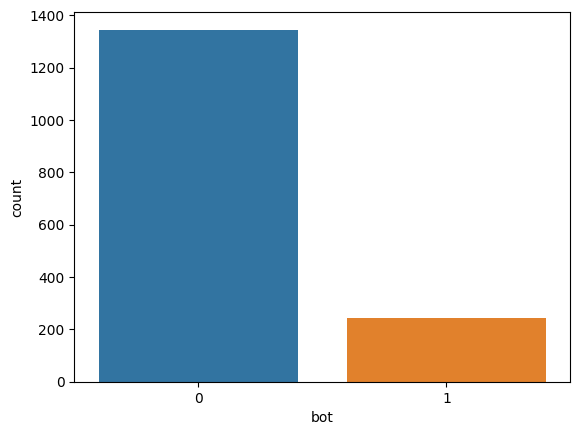

In [8]:
sns.countplot(x="bot", data=train)
plt.show()

## データ前処理

In [9]:
data = pd.concat([train, test], sort=False)

In [10]:
data.head()

,id,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
0,0,0.0,715,0,0,423,206,150,1,34,36981,0.684902,3958.863636,97.513514,1.473684,0.504505
1,2,0.0,2151,0,0,1457,1321,1704,1,90,35603,0.704787,2746.533708,69.988827,3.814815,0.553073
2,3,0.0,439,0,0,691,213,5,0,15,38432,0.528857,11005.031847,75.101266,1.142857,0.158228
3,7,0.0,28,1,0,285,31,0,0,1,4898,0.810427,6495.666667,93.029412,3.000000,0.029412
4,12,0.0,40,0,0,907,60,1013,1,2,47238,0.831579,112167.300000,79.142857,1.000000,0.047619


In [11]:
print(len(train), len(test), len(data))

1588 1588 3176


In [12]:
data.isnull().sum()

id                             0
bot                         1588
statuses_count                 0
default_profile                0
default_profile_image          0
friends_count                  0
followers_count                0
favourites_count               0
geo_enabled                    0
listed_count                   0
account_age_hours              0
diversity                      0
mean_mins_between_tweets       0
mean_tweet_length              0
mean_retweets                  0
reply_rate                     0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3176 entries, 0 to 1587
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        3176 non-null   int64  
 1   bot                       1588 non-null   float64
 2   statuses_count            3176 non-null   int64  
 3   default_profile           3176 non-null   int64  
 4   default_profile_image     3176 non-null   int64  
 5   friends_count             3176 non-null   int64  
 6   followers_count           3176 non-null   int64  
 7   favourites_count          3176 non-null   int64  
 8   geo_enabled               3176 non-null   int64  
 9   listed_count              3176 non-null   int64  
 10  account_age_hours         3176 non-null   int64  
 11  diversity                 3176 non-null   float64
 12  mean_mins_between_tweets  3176 non-null   float64
 13  mean_tweet_length         3176 non-null   float64
 14  mean_ret

In [14]:
delete_columns = ['id']
data.drop(delete_columns, axis=1, inplace=True)
data.head()

,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
0,0.0,715,0,0,423,206,150,1,34,36981,0.684902,3958.863636,97.513514,1.473684,0.504505
1,0.0,2151,0,0,1457,1321,1704,1,90,35603,0.704787,2746.533708,69.988827,3.814815,0.553073
2,0.0,439,0,0,691,213,5,0,15,38432,0.528857,11005.031847,75.101266,1.142857,0.158228
3,0.0,28,1,0,285,31,0,0,1,4898,0.810427,6495.666667,93.029412,3.000000,0.029412
4,0.0,40,0,0,907,60,1013,1,2,47238,0.831579,112167.300000,79.142857,1.000000,0.047619


In [15]:
train = data[:len(train)]
test = data[len(train):]

In [16]:
y_train = train['bot']
X_train = train.drop('bot', axis = 1)
X_test = test.drop('bot', axis = 1)

In [17]:
X_train.head()

,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
0,715,0,0,423,206,150,1,34,36981,0.684902,3958.863636,97.513514,1.473684,0.504505
1,2151,0,0,1457,1321,1704,1,90,35603,0.704787,2746.533708,69.988827,3.814815,0.553073
2,439,0,0,691,213,5,0,15,38432,0.528857,11005.031847,75.101266,1.142857,0.158228
3,28,1,0,285,31,0,0,1,4898,0.810427,6495.666667,93.029412,3.000000,0.029412
4,40,0,0,907,60,1013,1,2,47238,0.831579,112167.300000,79.142857,1.000000,0.047619


In [18]:
y_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: bot, dtype: float64

## 機械学習

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf = RandomForestClassifier()

In [21]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_pred = clf.predict(X_test)

In [23]:
y_pred[:20]

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0.])

In [24]:
clf.score(X_train, y_train)

0.9993702770780857

## データの出力

In [25]:
sub = sample_submit
sub[1] = list(map(int, y_pred))
sub.to_csv("/content/drive/MyDrive/bot/submit.csv", index=False, header=False)

In [26]:
sub.head()

,0,1
0,1,0
1,4,0
2,5,0
3,6,0
4,8,1
